Find the markdown blocks that say interaction required! The notebook should take care of the rest!

# Import libs

In [1]:
import sys
import os
sys.path.append('..')
from eflow.foundation import DataPipeline,DataFrameTypes
from eflow.model_analysis import ClassificationAnalysis
from eflow.utils.modeling_utils import optimize_model_grid
from eflow.utils.eflow_utils import get_type_holder_from_pipeline, remove_unconnected_pipeline_segments
from eflow.utils.pandas_utils import data_types_table
from eflow.auto_modeler import AutoCluster

import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import copy
import pickle
from IPython.display import clear_output

In [2]:
# # Additional add ons
# !pip install pandasgui
# !pip install pivottablejs
# clear_output()

In [3]:
%matplotlib notebook
%matplotlib inline

## Declare Project Variables

### Interaction required

In [4]:
dataset_path = "Datasets/titanic_train.csv"

# -----
dataset_name = "Titanic Data"
pipeline_name = "Titanic Pipeline"

# -----


# -----
notebook_mode = True

## Clean out segment space

In [5]:
remove_unconnected_pipeline_segments()

# Import dataset

In [6]:
df = pd.read_csv(dataset_path)
shape_df = pd.DataFrame.from_dict({'Rows': [df.shape[0]],
                                   'Columns': [df.shape[1]]})
display(shape_df)
display(df.head(30))

,Rows,Columns
0,891,12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data_types_table(df)

,Data Types
Features,
Age,float64
Fare,float64
PassengerId,int64
Survived,int64
Pclass,int64
SibSp,int64
Parch,int64
Name,object
Sex,object


# Loading and init df_features

In [8]:
# Option: 1
# df_features = get_type_holder_from_pipeline(pipeline_name)

In [9]:
# Option: 2
df_features = DataFrameTypes()
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")

In [10]:
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

,Data Types
Features,
Sex,string
Embarked,string
Cabin,string
Pclass,string
Survived,bool
SibSp,integer
Parch,integer
Fare,float
Age,float


# Any extra processing before eflow DataPipeline

# Setup pipeline structure

### Interaction Required

In [11]:
main_pipe = DataPipeline(pipeline_name,
                         df,
                         df_features)

The file 'root_pipeline.json' exist!
Now configuring object with proper pipeline segments...
Removing the feature: "Name"
Removing the feature: "PassengerId"
Removing the feature: "Ticket"


In [12]:
main_pipe.perform_pipeline(df,
                           df_features)

Ignore feature:  Fare


In [13]:
df

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,22.000000,1,0,7.2500,False,True,False,False,True,False,False,True
1,1,38.000000,1,0,71.2833,True,False,True,False,False,True,False,False
2,1,26.000000,0,0,7.9250,True,False,False,False,True,False,False,True
3,1,35.000000,1,0,53.1000,True,False,True,False,False,False,False,True
4,0,35.000000,0,0,8.0500,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,True,False,False,False,True
887,1,19.000000,0,0,30.0000,True,False,True,False,False,False,False,True
888,0,29.444268,1,2,23.4500,True,False,False,False,True,False,False,True
889,1,26.000000,0,0,30.0000,False,True,True,False,False,True,False,False


# Generate clustering models with automodeler


Inspecting scaled results!


,Mean,Standard Dev
Survived,3.987333e-17,1.0
Age,1.594933e-16,1.0
SibSp,4.386066e-17,1.0
Parch,5.382900e-17,1.0
Fare,3.987333e-18,1.0
Sex_female,3.987333e-17,1.0
Sex_male,-1.156327e-16,1.0
Pclass_1,-7.575933e-17,1.0
Pclass_2,1.993666e-17,1.0
Pclass_3,-6.778466e-17,1.0


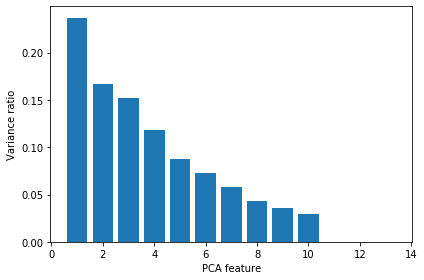

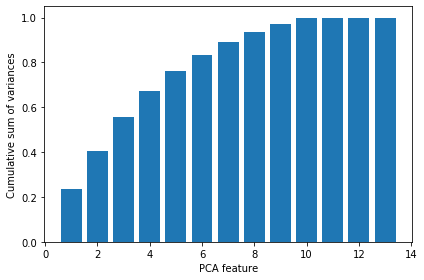


Inspecting applied scaler and pca results!


,Mean,Standard Dev
PCA_Feature_1,5.980999e-17,1.755406e+00
PCA_Feature_2,-3.189866e-17,1.473500e+00
PCA_Feature_3,8.572766e-17,1.403483e+00
PCA_Feature_4,-2.392400e-17,1.237023e+00
PCA_Feature_5,-5.582266e-17,1.063722e+00
PCA_Feature_6,7.974666e-18,9.749387e-01
PCA_Feature_7,9.768966e-17,8.667995e-01
PCA_Feature_8,5.980999e-18,7.509349e-01
PCA_Feature_9,4.984166e-17,6.864391e-01
PCA_Feature_10,-1.036707e-16,6.155528e-01


After applying pca with a cutoff percentage 0.8% for the cumulative index. Using features 1 to 6
Old shape (891, 13)
New shape (891, 6)

Inspecting data after final scaler applied!


,Mean,Standard Dev
PCA_Feature_1,7.974666e-18,1.0
PCA_Feature_2,-2.392400e-17,1.0
PCA_Feature_3,1.395567e-17,1.0
PCA_Feature_4,-1.196200e-17,1.0
PCA_Feature_5,-7.974666e-18,1.0
PCA_Feature_6,7.974666e-18,1.0


In [14]:
auto_cluster = AutoCluster(df,
                           df_features,
                           project_sub_dir=dataset_name,
                           overwrite_full_path=None,
                           notebook_mode=True,
                           pca_perc=.8)

### Temporialy remove dataframe to save RAM for processing

In [15]:
del df

# Inspect Hierarchical models

Creating graphic for Hierarchical Clustering Method: complete...


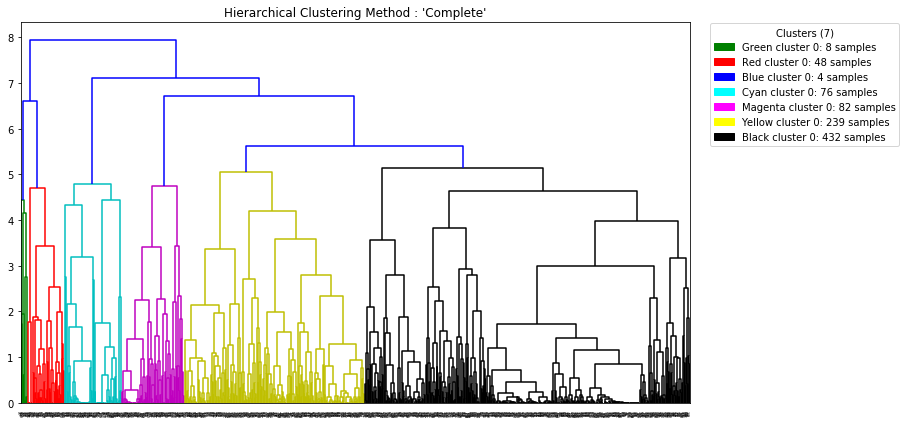

Creating graphic for Hierarchical Clustering Method: single...


<Figure size 432x288 with 0 Axes>

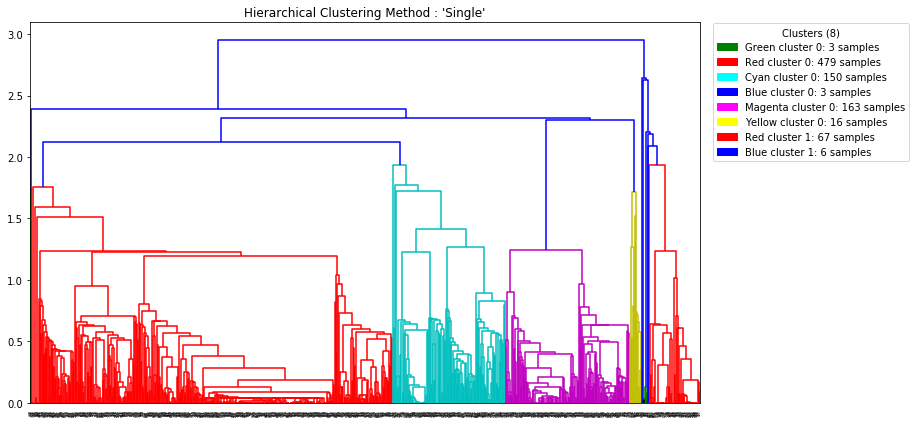

Creating graphic for Hierarchical Clustering Method: weighted...


<Figure size 432x288 with 0 Axes>

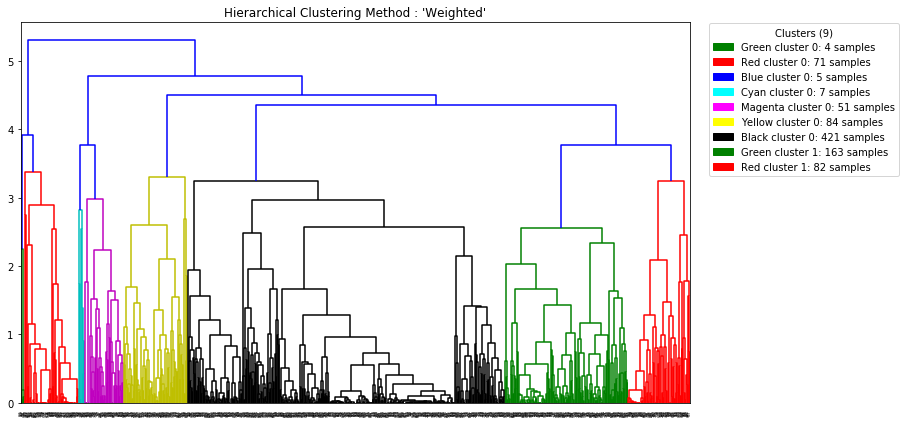

Creating graphic for Hierarchical Clustering Method: ward...


<Figure size 432x288 with 0 Axes>

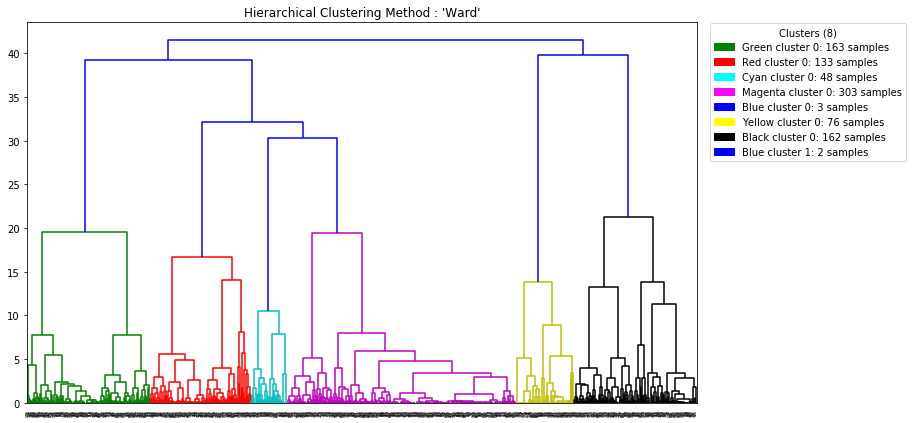

Creating graphic for Hierarchical Clustering Method: average...


<Figure size 432x288 with 0 Axes>

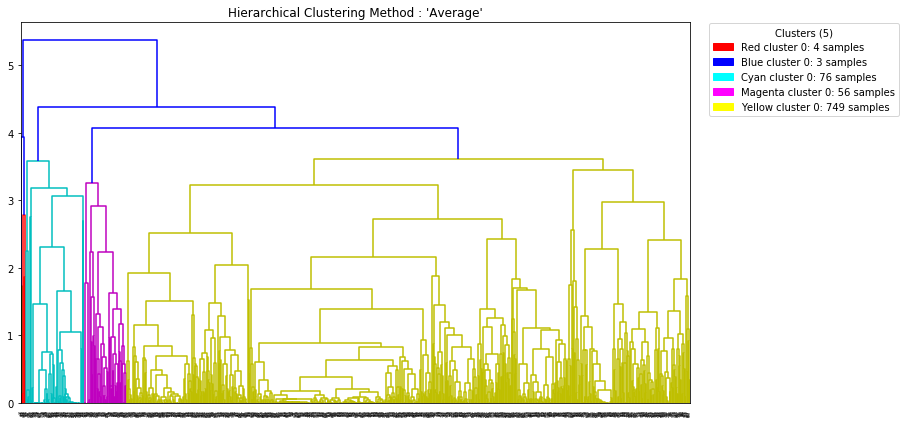

Creating graphic for Hierarchical Clustering Method: centroid...


<Figure size 432x288 with 0 Axes>

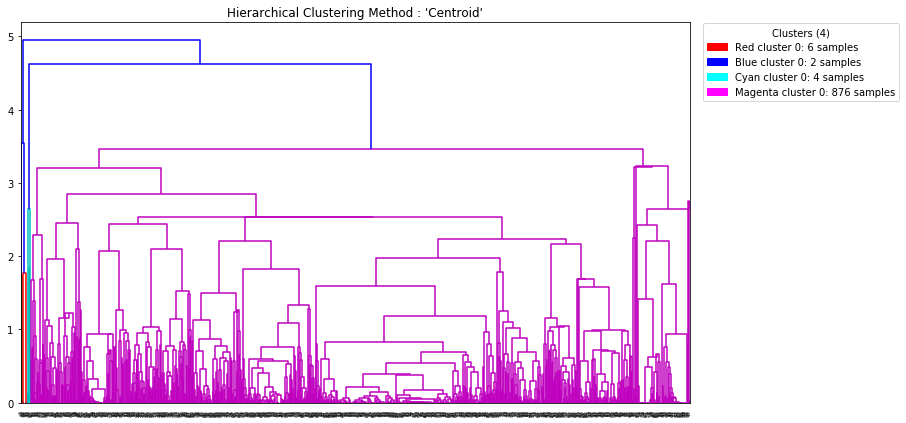

Creating graphic for Hierarchical Clustering Method: median...


<Figure size 432x288 with 0 Axes>

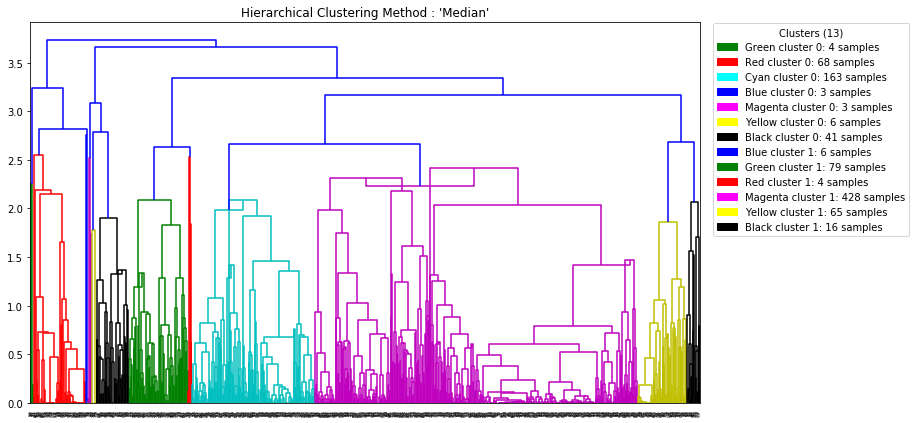

[4, 5, 7, 8, 8, 9, 13]

<Figure size 432x288 with 0 Axes>

In [16]:
auto_cluster.visualize_hierarchical_clustering()

Cure Elbow Seq Count 1: 100%|██████████| 15/15 [00:01<00:00,  9.14it/s, model_count=15]


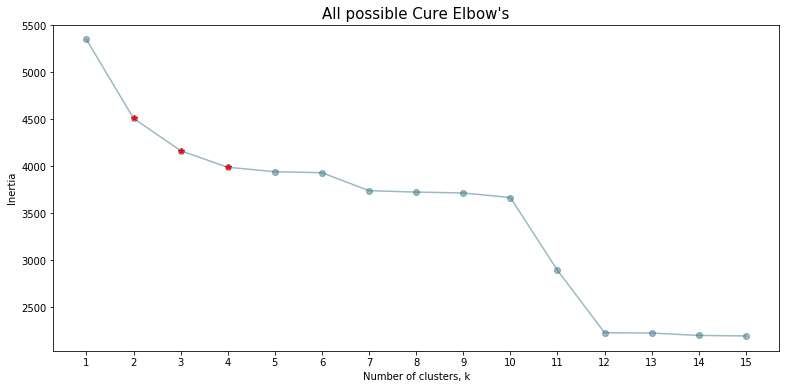

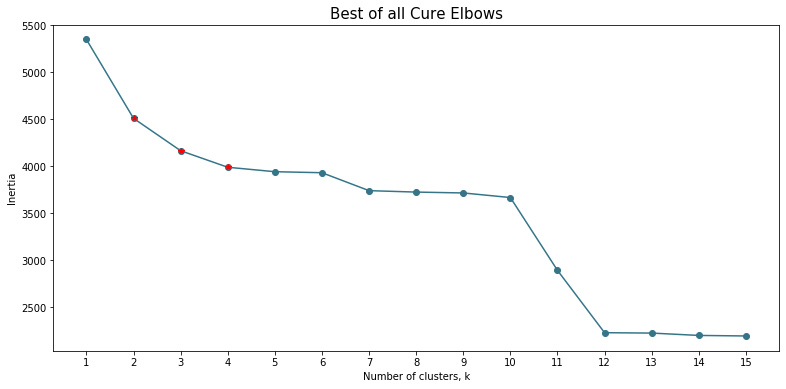

,Proximity Knees,Counts
0,2,1
1,3,1
2,4,1


,Main Knees,Counts
0,3,1


K-Medoids Elbow Seq Count 6: 100%|██████████| 15/15 [00:01<00:00, 14.69it/s, model_count=15]


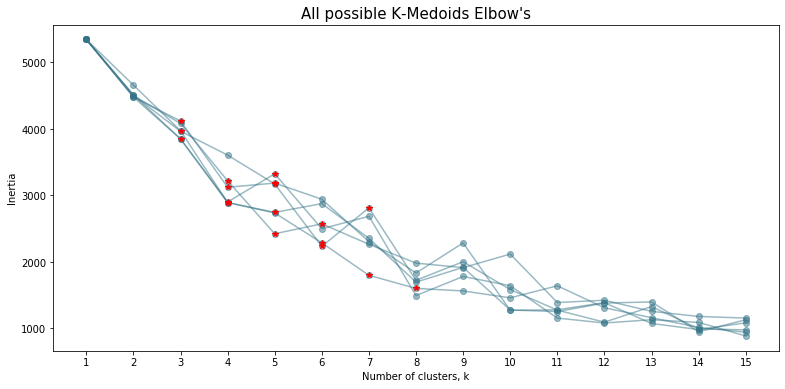

Something went wrong when trying to save the model: K-Medoids
Something went wrong when trying to save the model: K-Medoids
Something went wrong when trying to save the model: K-Medoids


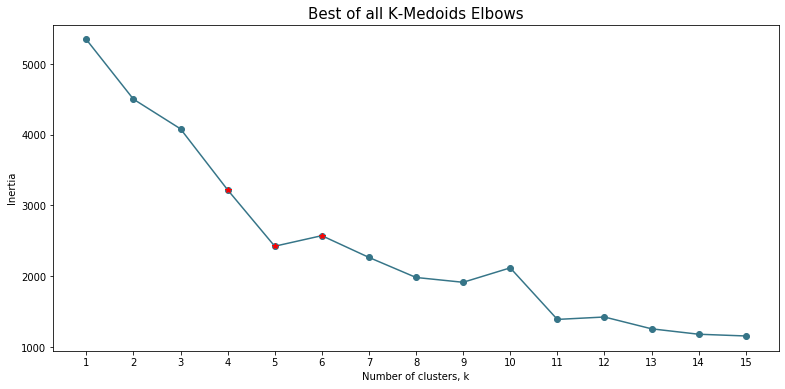

,Proximity Knees,Counts
2,5,5
1,4,4
0,3,3
3,6,3
4,7,2
5,8,1


,Main Knees,Counts
0,4,3
1,7,1
2,5,1
3,6,1


Fuzzy C-means Elbow Seq Count 6: 100%|██████████| 15/15 [00:01<00:00,  9.97it/s, model_count=15]


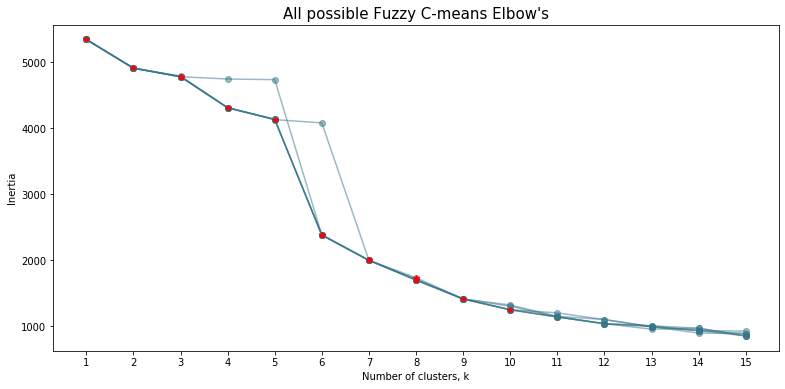

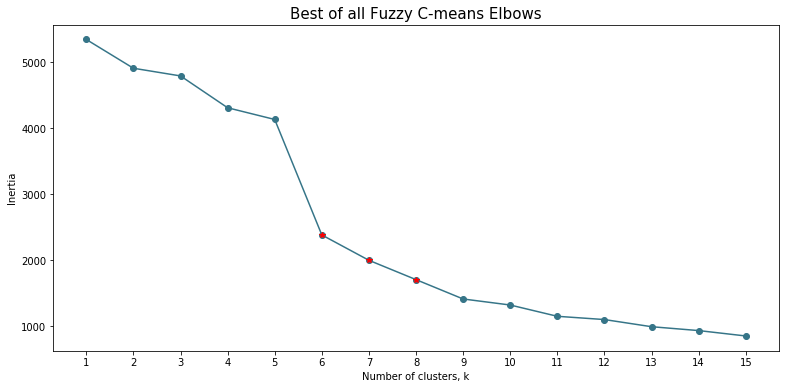

,Proximity Knees,Counts
2,8,4
0,6,3
1,7,3
5,3,2
3,1,1
4,2,1
6,9,1
7,10,1
8,4,1
9,5,1


,Main Knees,Counts
0,7,3
1,2,1
2,9,1
3,4,1


K-Means Elbow Seq Count 6: 100%|██████████| 15/15 [00:01<00:00, 14.60it/s, model_count=15]


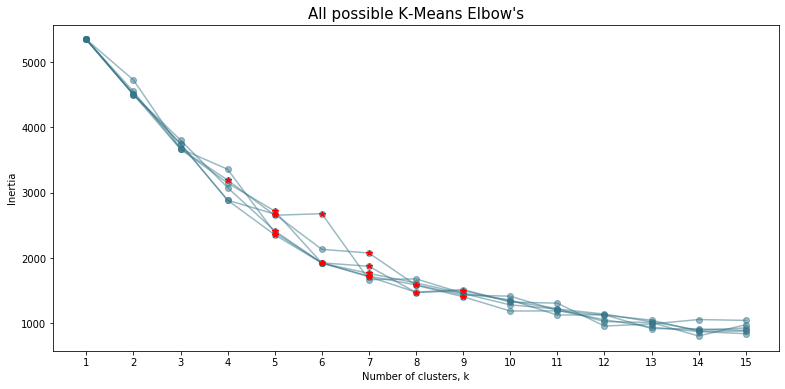

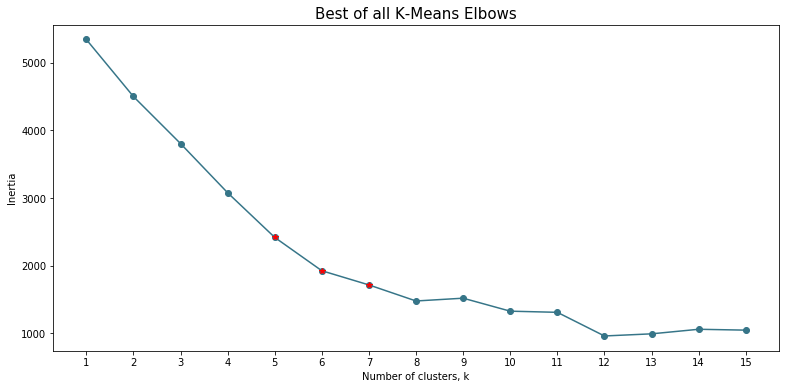

,Proximity Knees,Counts
0,7,5
3,5,4
4,6,4
1,8,2
2,9,2
5,4,1


,Main Knees,Counts
1,6,3
0,8,2
2,5,1


K-Medians Elbow Seq Count 6: 100%|██████████| 15/15 [00:01<00:00, 10.58it/s, model_count=15]


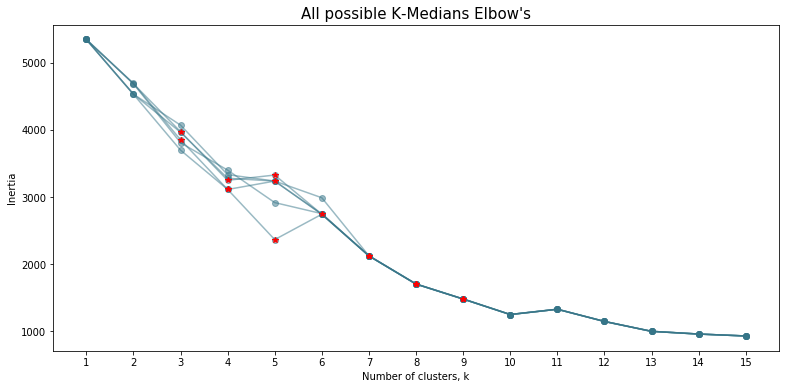

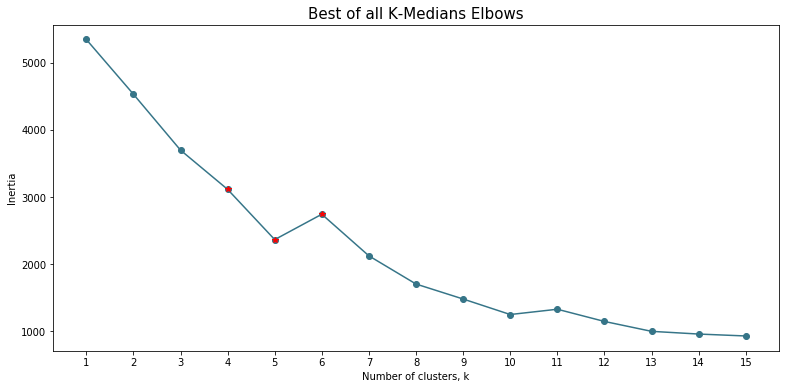

,Proximity Knees,Counts
0,7,3
1,8,3
2,9,3
4,4,3
5,5,3
3,3,2
6,6,1


,Main Knees,Counts
0,8,3
1,4,2
2,5,1


Somsc Elbow Seq Count 1: 100%|██████████| 15/15 [00:01<00:00, 14.30it/s, model_count=15]


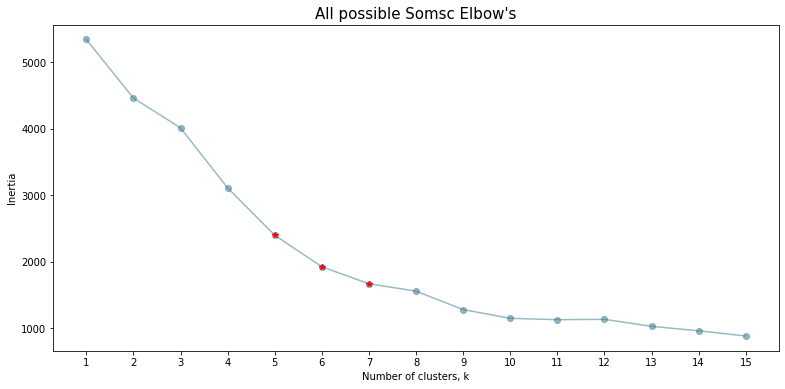

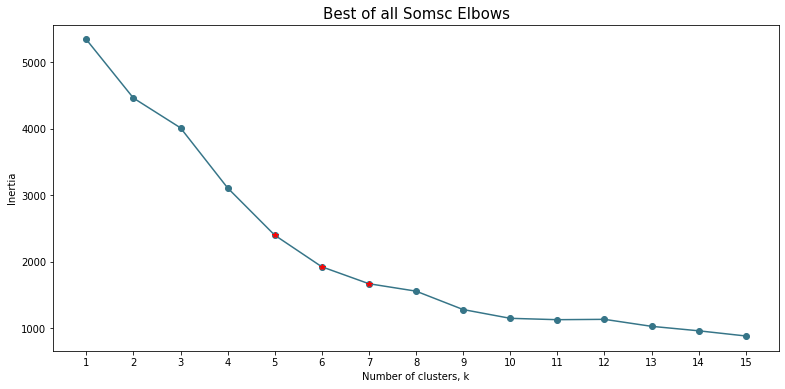

,Proximity Knees,Counts
0,5,1
1,6,1
2,7,1


,Main Knees,Counts
0,6,1


In [17]:
best_elbows = auto_cluster.create_elbow_models(repeat_operation=6,
                                               max_k_value=15)

In [18]:
# from pyclustering.cluster.ema import ema, ema_visualizer
# from pyclustering.utils import read_sample
# from pyclustering.samples.definitions import FCPS_SAMPLES

# for i in range(1,30):
#     # Read data from text file.
#     sample = read_sample(FCPS_SAMPLES.SAMPLE_LSUN)
#     # Create EM algorithm to allocated four clusters.
#     ema_instance = ema(sample, i)
#     # Run clustering process.
#     ema_instance.process()
#     # Get clustering results.
#     clusters = ema_instance.get_clusters()
#     covariances = ema_instance.get_covariances()
#     means = ema_instance.get_centers()
#     # Visualize obtained clustering results.
#     ema_visualizer.show_clusters(clusters, sample, covariances, means)


#     a = ema_instance.get_clusters()
#     display(len(a))

Rock and Ema are special cases for creating elbows for

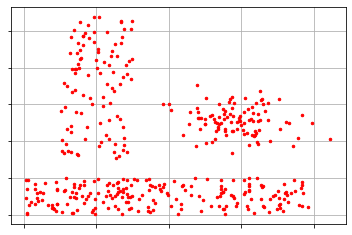

Passed test


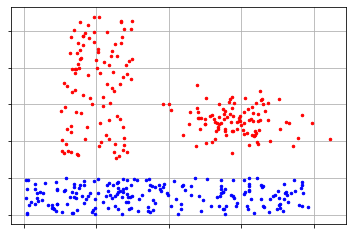

Passed test


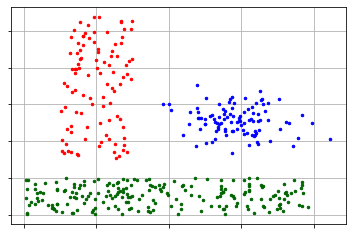

Passed test


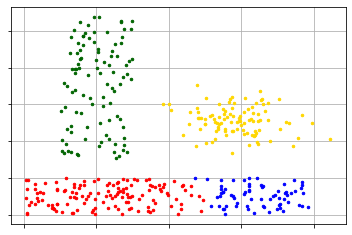

Passed test


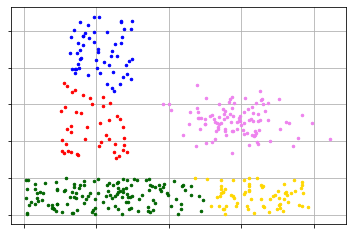

Passed test


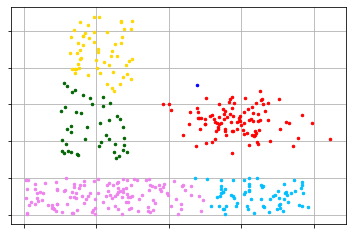

Passed test


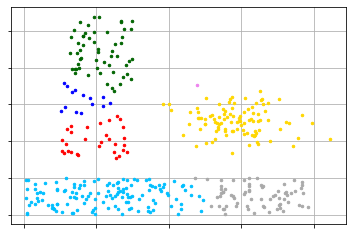

Passed test


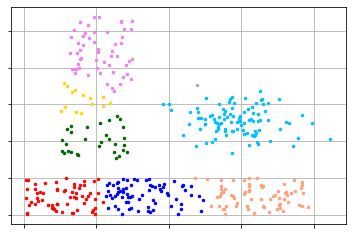

Passed test


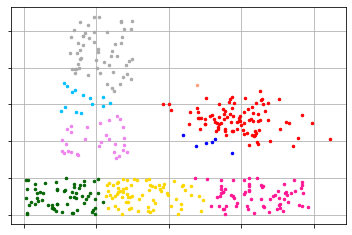

Passed test


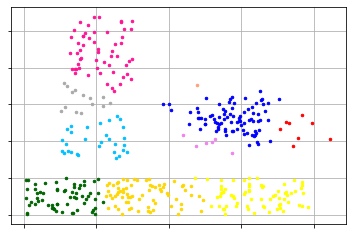

Passed test


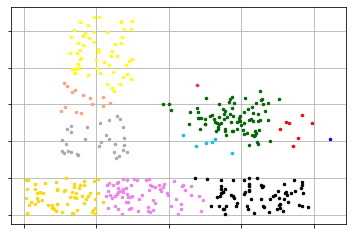

Passed test


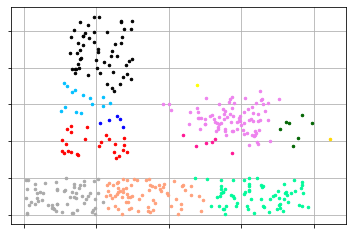

Passed test


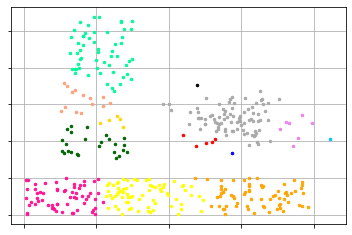

Passed test


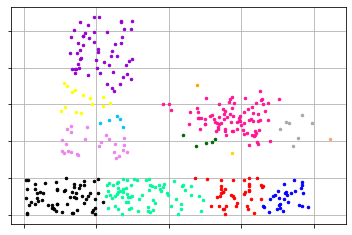

Passed test


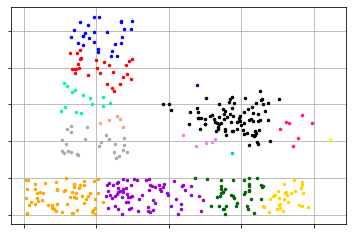

Passed test


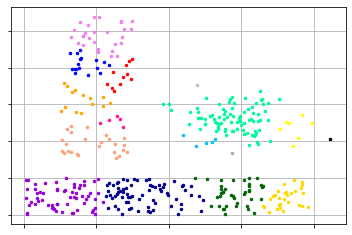

Passed test


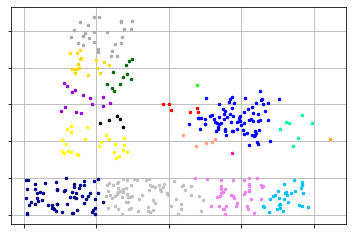

Passed test


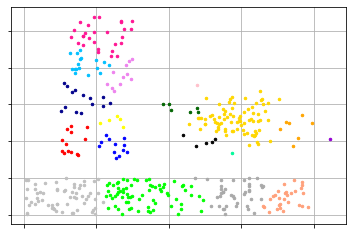

Passed test


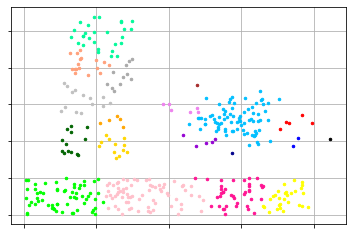

Passed test


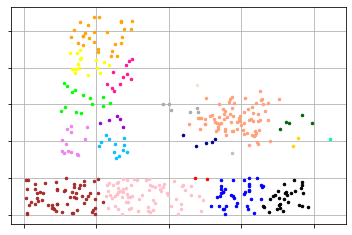

Passed test


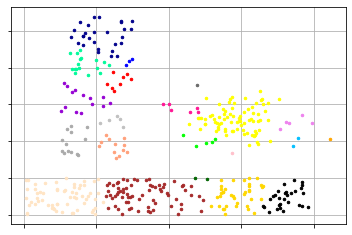

Passed test


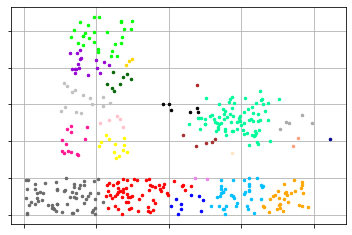

Passed test


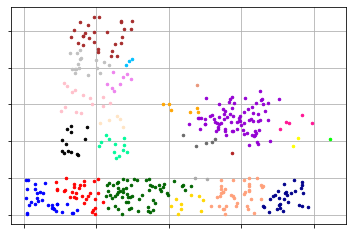

Passed test


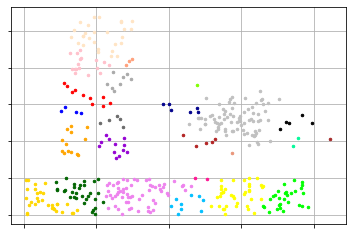

Passed test


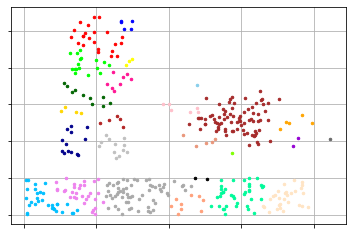

Passed test


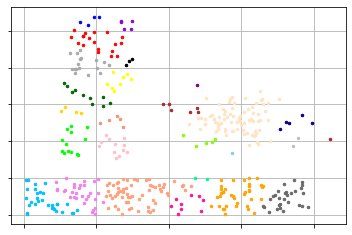

Passed test


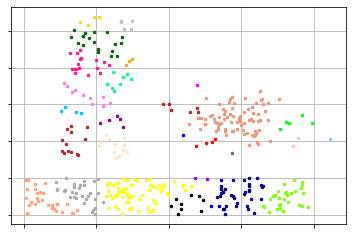

Passed test


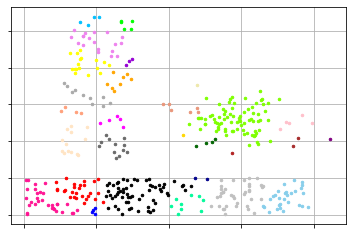

Passed test


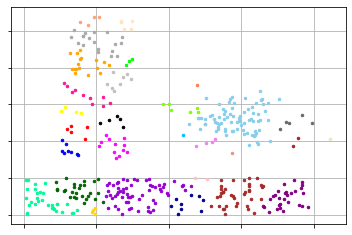

Passed test


In [19]:
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES

for i in range(1,30):

    # Input data in following format [ [0.1, 0.5], [0.3, 0.1], ... ].
    input_data = read_sample(FCPS_SAMPLES.SAMPLE_LSUN);
    # Allocate three clusters.
    cure_instance = cure(input_data, i);
    cure_instance.process();
    clusters = cure_instance.get_clusters();
    # Visualize allocated clusters.
    visualizer = cluster_visualizer();
    visualizer.append_clusters(clusters, input_data);
    visualizer.show();

    if i == len(clusters):
        print("Passed test")
    else:
        print("Failed test")
        print(i)
        print(len(clusters))
        raise ValueError("Failed test")

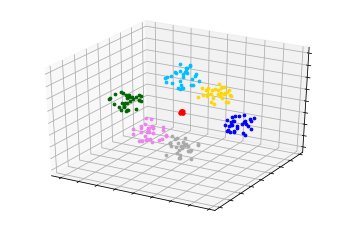

7
Passed test


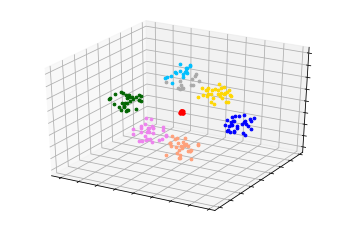

8
Passed test


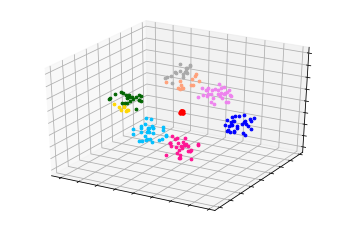

9
Passed test


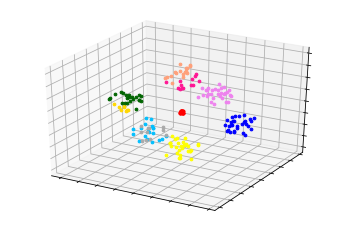

10
Passed test


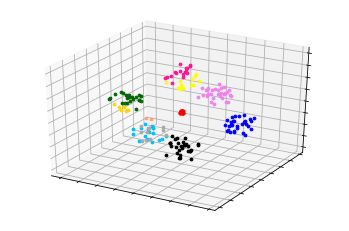

11
Passed test


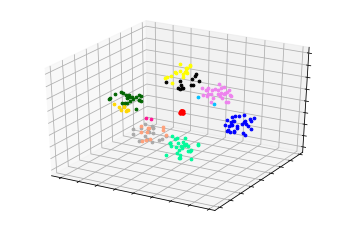

12
Passed test


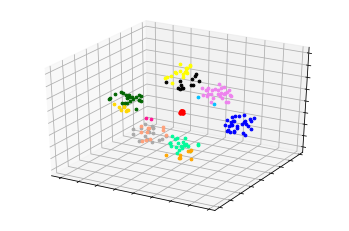

13
Passed test


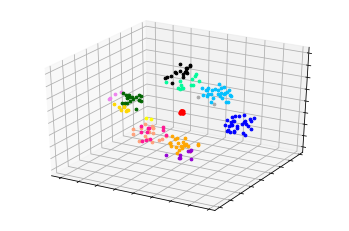

14
Passed test


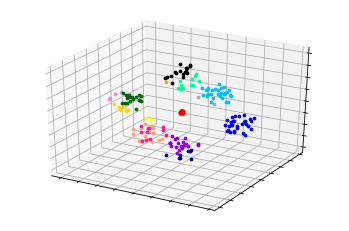

15
Passed test


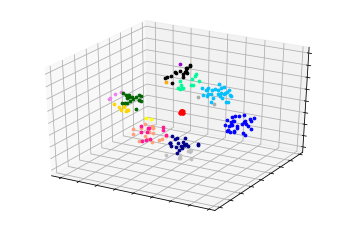

16
Passed test


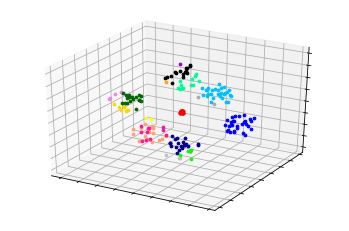

17
Passed test


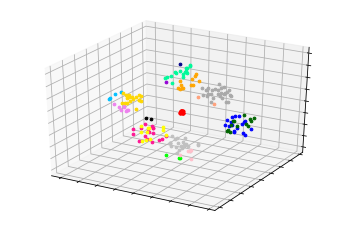

18
Passed test


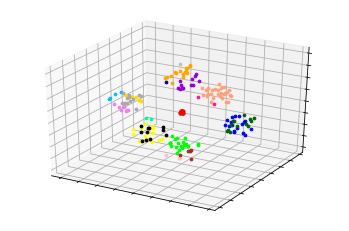

19
Passed test


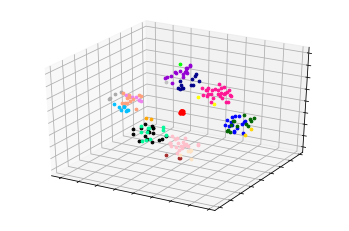

20
Passed test


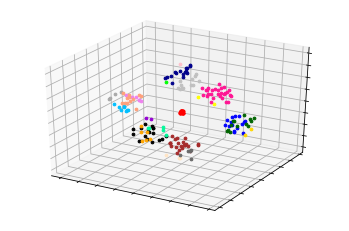

21
Passed test


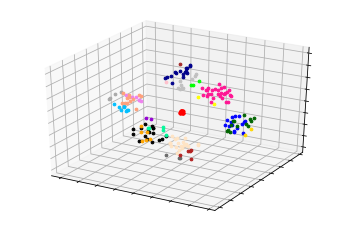

22
Passed test


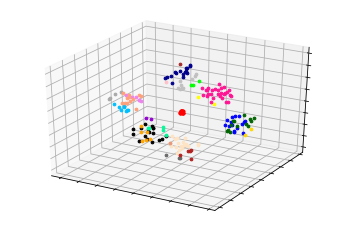

23
Passed test


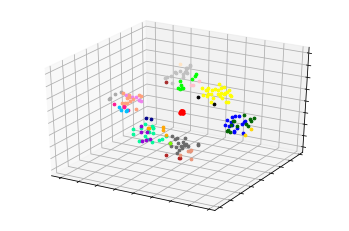

24
Passed test


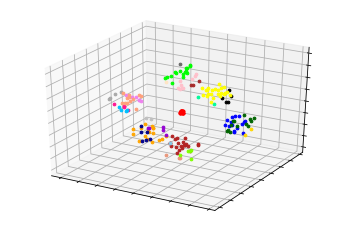

25
Passed test


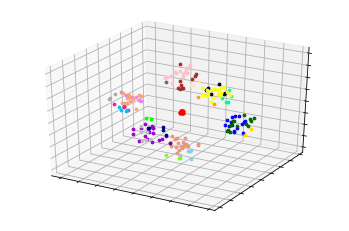

26
Passed test


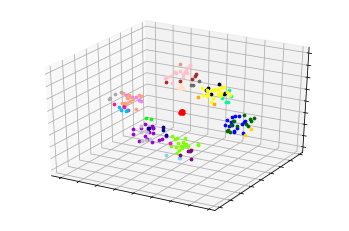

27
Passed test


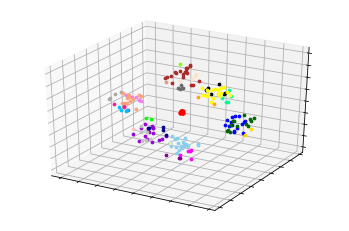

28
Passed test


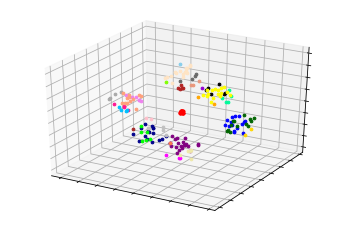

29
Passed test


In [20]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.rock import rock
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

for i in range(7,30):
    # Read sample for clustering from file.
    sample = read_sample(FCPS_SAMPLES.SAMPLE_HEPTA)
    # Create instance of ROCK algorithm for cluster analysis. Seven clusters should be allocated.
    rock_instance = rock(sample, 1, i)
    # Run cluster analysis.
    rock_instance.process()
    # Obtain results of clustering.
    clusters = rock_instance.get_clusters()
    # Visualize clustering results.
    visualizer = cluster_visualizer()
    visualizer.append_clusters(clusters, sample)
    visualizer.show()
    print(i)

    
    if i == len(clusters):
        print("Passed test")
    else:
        print("Failed test")
        print(i)
        print(len(clusters))
        raise ValueError("Failed test")

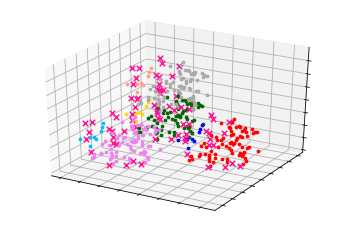

8


In [21]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.optics import optics
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
# Read sample for clustering from some file.
sample = read_sample(FCPS_SAMPLES.SAMPLE_TETRA)
# Run cluster analysis where connectivity radius is bigger than real.
radius = 0.4
neighbors = 6
optics_instance = optics(sample, radius, neighbors)
# Performs cluster analysis.
optics_instance.process()
# Obtain results of clustering.
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
# Visualize clustering results (clusters and outliers).
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.append_cluster(noise, sample, marker='x')
visualizer.show()
print(len(clusters))

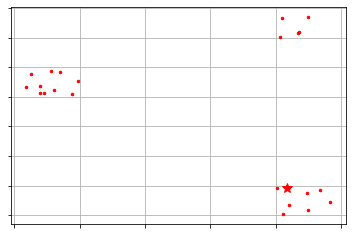

1


In [22]:
from pyclustering.cluster.bsas import bsas_visualizer
from pyclustering.cluster.mbsas import mbsas
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
# Read data sample from 'Simple02.data'.
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE2)
# Prepare algorithm's parameters.
max_clusters = 10
threshold = 10
# Create instance of MBSAS algorithm.
mbsas_instance = mbsas(sample, max_clusters, threshold)
mbsas_instance.process()
# Get clustering results.
clusters = mbsas_instance.get_clusters()
representatives = mbsas_instance.get_representatives()
# Display results.
bsas_visualizer.show_clusters(sample, clusters, representatives)
print(len(clusters))

In [23]:
from pyclustering.samples.definitions import FAMOUS_SAMPLES
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.fcm import fcm
from pyclustering.utils import read_sample
# load list of points for cluster analysis
for i in range(1,30):
    sample = read_sample(FAMOUS_SAMPLES.SAMPLE_OLD_FAITHFUL)
    # initialize
    initial_centers = kmeans_plusplus_initializer(sample, i, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
    # create instance of Fuzzy C-Means algorithm
    fcm_instance = fcm(sample, initial_centers)
    # run cluster analysis and obtain results
    fcm_instance.process()
    clusters = fcm_instance.get_clusters()
    centers = fcm_instance.get_centers()
    # visualize clustering results
    if i == len(clusters):
        print("Passed test")
    else:
        print("Failed test")
        print(i)
        print(len(clusters))
        raise ValueError("Failed test")

Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test
Passed test


# High vote

Total WCE: 113.0769098917286


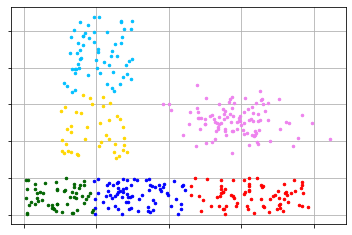

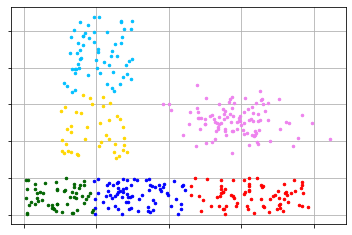

In [24]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.gmeans import gmeans
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Read sample 'Lsun' from file.
sample = read_sample(FCPS_SAMPLES.SAMPLE_LSUN)
# Create instance of G-Means algorithm. By default the algorithm starts search from a single cluster.
gmeans_instance = gmeans(sample).process()
# Extract clustering results: clusters and their centers
clusters = gmeans_instance.get_clusters()
centers = gmeans_instance.get_centers()
# Print total sum of metric errors
print("Total WCE:", gmeans_instance.get_total_wce())
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

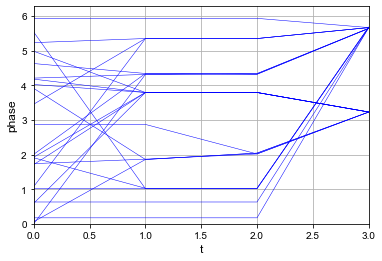

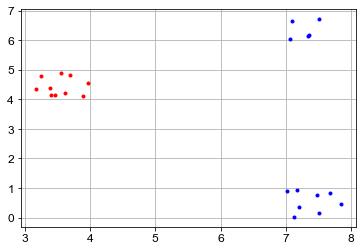

2


In [25]:
from pyclustering.cluster.hsyncnet import hsyncnet
from pyclustering.nnet.sync import sync_visualizer
from pyclustering.utils import read_sample, draw_clusters
from pyclustering.samples.definitions import SIMPLE_SAMPLES
# Read list of points for cluster analysis.
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE2)
# Create network for allocation of three clusters.
network = hsyncnet(sample, 5)
# Run cluster analysis and output dynamic of the network.
analyser = network.process(0.995, collect_dynamic=True)
# Get allocated clusters.
clusters = analyser.allocate_clusters(eps=0.1)
# Show output dynamic of the network.
sync_visualizer.show_output_dynamic(analyser)
# Show allocated clusters.
draw_clusters(sample, clusters)

print(len(clusters))

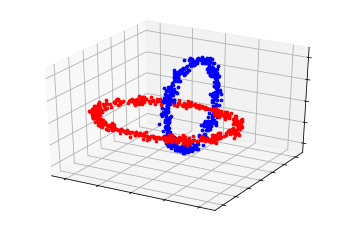

2


In [26]:
from pyclustering.cluster.dbscan import dbscan
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Sample for cluster analysis.
sample = read_sample(FCPS_SAMPLES.SAMPLE_CHAINLINK)
# Create DBSCAN algorithm.
dbscan_instance = dbscan(sample, 0.7, 20)
# Start processing by DBSCAN.
dbscan_instance.process()
# Obtain results of clustering.
clusters = dbscan_instance.get_clusters()
noise = dbscan_instance.get_noise()
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.append_cluster(noise, sample, marker='x')
visualizer.show()

print(len(clusters))


Total WCE: 9.573392712337068


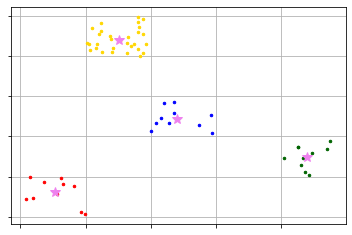

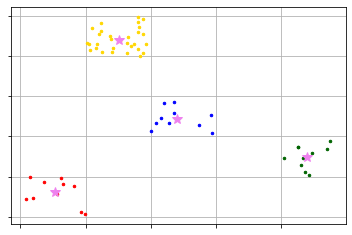

In [27]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
# Read sample 'simple3' from file.
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()
# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(sample, initial_centers, 20)
xmeans_instance.process()
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.append_cluster(centers, None, marker='*', markersize=10)
visualizer.show()

In [28]:
# a[0]
a[0]
df.loc[a[0]]

NameError: name 'a' is not defined

In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
# Read sample 'simple3' from file.
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()
# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(sample, initial_centers, 20)
xmeans_instance.process()
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.append_cluster(centers, None, marker='*', markersize=10)
visualizer.show()

In [ ]:
raise ValueError("")

In [ ]:
raise ValueError("Testing")

In [ ]:
df = pd.read_csv(dataset_path)
df

In [ ]:
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

In [ ]:
main_pipe.perform_pipeline(df,
                           df_features)

In [ ]:
df

In [ ]:
from kneed import DataGenerator, KneeLocator

x = [5346.0, 4464.47220442314, 3650.8164825776444, 2883.4865344266404, 2353.5226410046207, 1923.7811636297681, 1668.8974296738902, 1472.2444437394222, 1280.4754069907601, 1149.2682037351174, 1057.4340058596358, 959.3105185259967, 881.3187084234528, 806.0797704821307]
kneedle = KneeLocator(x, [i for i in range(0,len(x))], curve='concave', direction='increasing', interp_method='polynomial', online=True)

# average knee point
print(kneedle.knee)
round(sum(knees) / len(knees), 3)
63.583

In [ ]:
inertias = [5346.0, 4464.47220442314, 3650.8164825776444]
inertias_matrix = np.matrix(inertias)

In [ ]:
inertias_matrix

In [ ]:
inertias_matrix = np.vstack([inertias_matrix, [5000, 4000, 3680]])
inertias_matrix = np.vstack([inertias_matrix, [7000, 6000, 4680]])
inertias_matrix = np.vstack([inertias_matrix, [5700, 5300, 4680]])

inertias_matrix

In [ ]:
average_elbow_inertias = inertias_matrix.mean(0)
average_elbow_inertias

In [ ]:
knee_vote = []

for vector in inertias_matrix:
    knee_vote.append(np.absolute(vector - average_elbow_inertias).sum())

best_elbow_index = np.array(knee_vote).argmin()
best_of_elbows